# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework 1 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the first of three equally weighted pieces of assessed coursework for this module.


- This is independent work, you cannot work in groups.


- There are four equally weighted questions below.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- Submit your solutions as Jupyter notebooks via Github classroom - please submit a version where you have run all cells and the output/plots etc are visible.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework-1A---Implementing-the-RK2-family-of-methods" data-toc-modified-id="Coursework-1A---Implementing-the-RK2-family-of-methods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework 1A - Implementing the RK2 family of methods</a></span></li><li><span><a href="#Coursework-1B---Implementing-Taylor-series-methods" data-toc-modified-id="Coursework-1B---Implementing-Taylor-series-methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coursework 1B - Implementing Taylor series methods</a></span></li><li><span><a href="#Coursework-1C---Implementing-the-Adams-Moulton-3-step-method-(AM3)" data-toc-modified-id="Coursework-1C---Implementing-the-Adams-Moulton-3-step-method-(AM3)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coursework 1C - Implementing the Adams-Moulton 3-step method (AM3)</a></span></li><li><span><a href="#Coursework-1D---Implementing-backward-Euler-using-a-nonlinear-system-solver" data-toc-modified-id="Coursework-1D---Implementing-backward-Euler-using-a-nonlinear-system-solver-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coursework 1D - Implementing backward Euler using a nonlinear system solver</a></span></li></ul></div>

# Coursework 1A - Implementing the RK2 family of methods

Write a function that implements the RK2 family of methods which takes in the free parameter $\alpha$ that appears in the most general definition of RK2.

For example the first line of your function might read

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

where `f` is a function of time and the solution $y$.

Perform some verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5. 

Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given by
the test case we saw in lecture 6:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

```python
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6
```

Consider a simple error metric given by the error in the solution at time $t=3$.

Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.

Also, for a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$.  

What is the optimal value of $\alpha$ which minimises the error for this problem?

In [1]:
# Import libraries and set up plotting parameters.

import numpy as np
from math import pi
from math import factorial
import scipy.optimize as sop
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['font.size'] = 16


# Coursework 1A - Implementation


## RK2 methods

The family of the second order Runge-Kutta scheme is defined by the formulae:

\begin{align*}
k_1 & = \Delta t\, f(t_n, y_n), \\[10pt]
k_2 & = \Delta t\, f(t_n + \alpha \Delta t, y_n + \alpha k_1), \\[10pt]
y_{n+1} &= y_n + \left( 1 - \frac{1}{2\alpha}\right) k_1 + 
 \frac{1}{2\alpha} k_2.
\end{align*}

In [2]:
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
    """
    Implement the RK2 family of methods.
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation.
    y0 : floating point or vector of floating point
        Starting conditions.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step size.
    alpha : floating point
        Parameter in the RK2 formulae.

    Returns
    -------
    y_all : numpy array
        Values of the solution.
    t_all : numpy array
        Time values where solution is evaluated.
    """
    y = y0
    t = t0
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt * f(t+alpha*dt, y+alpha*k1)
        y = y + (1-1/(2*alpha))*k1 + 1/(2*alpha)*k2
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


def forward_euler(f, y0, t0, t_max, dt):
    """
    Forward Euler method.
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation. It is a function of time and the solution y.
    y0 : floating point or vector of floating point
        Starting conditions.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step.

    Returns
    -------
    y_all : numpy array
        Values of the solution.
    t_all : numpy array
        Time values where solution is evaluated
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


def improved_euler(f, y0, t0, t_max, dt):
    """
    Improved Euler method.
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation. It is a function of time and the solution y.
    y0 : floating point or vector of floating point
        Starting conditions.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step.

    Returns
    -------
    y_all : numpy array
        Values of the solution.
    t_all : numpy array
        Time values where solution is evaluated.
    """
    y = y0
    t = t0
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y_fe = y + dt*f(t, y)  # forward Euler guess
        y = y + 0.5*dt * ( f(t, y) + f(t + dt, y_fe) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


def f(t, y):
    """
    RHS function.
    """
    return y + t**3


def y_ex(t):
    """
    Analytical solution considering the RHS defined in the function f.
    """
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6


def approx_error_euler(y_ex, y0, t0, t_max, dt):
    """
    Get the LTE for the forward and Euler methods.
    
    Parameters
    ----------
    y_ex : function
        Analytical solution to the problem.
    y0 : floating point
        Value of y at time t=0.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step.

    Returns
    -------
    err1 : numpy array
        LTE for forward Euler.
    err2 : numpy array
        LTE for improved Euler.
    """
    y_all, t_all = forward_euler(f, y0, t0, t_max, dt)
    err1 = abs(y_all[-1] - y_ex(t_max))
    y_all, t_all = improved_euler(f, y0, t0, t_max, dt)
    err2 = abs(y_all[-1] - y_ex(t_max))
    return np.array(err1), np.array(err2)


def approx_error_rk2(y_ex, y0, t0, t_max, dt, alpha):
    """
    Get the LTE for the forward and Euler methods.
    
    Parameters
    ----------
    y_ex : function
        Analytical solution to the problem.
    y0 : floating point
        Value of y at time t=0.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step.
    alpha : floating point
        Parameter weighting the time step.

    Returns
    -------
    err : numpy array
        LTE for the RK2 method.
    """
    y_all, t_all = RK2_alpha(f, y0, t0, t_max, dt, alpha)
    err = abs(y_all[-1] - y_ex(t_max))
    return np.array(err)


def f_decay(t, C):
    """
    Function defining an esponential decay problem.
    """
    return -K*C

Improved Euler and RK2 solutions are the same: True
Improved Euler and RK2 solutions are the same: True


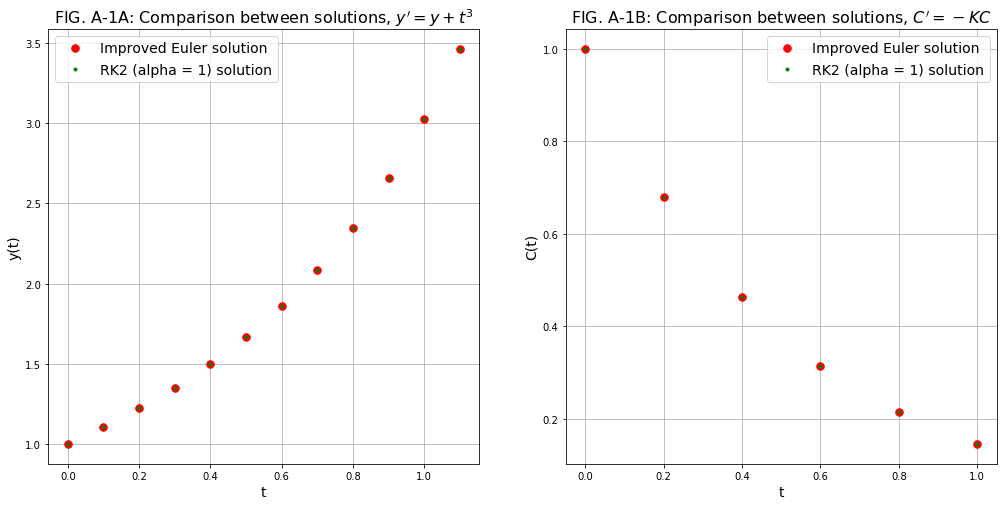

In [3]:
# FIGURE A-1

# Get numerical solution using improved euler and RK2 with alpha = 1, demostrating
# that they obtain the same results.


# Set the figure up.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))


dt = 0.1
y0 = 1.0
t0 = 0.0
t_max = 1.
dt = 0.1
ie, t_all = improved_euler(f, y0, t0, t_max, dt)
rk2, t_all = RK2_alpha(f, y0, t0, t_max, dt, alpha=1)

print('Improved Euler and RK2 solutions are the same:', np.allclose(ie, rk2))

ax1.plot(t_all, ie, 'r.', label = 'Improved Euler solution', markersize = 15)
ax1.plot(t_all, rk2, 'g.', label = 'RK2 (alpha = 1) solution', markersize = 6)
ax1.set_title("FIG. A-1A: Comparison between solutions, $y' = y + t^3$", fontsize = 16)
ax1.set_xlabel('t', fontsize = 14)
ax1.set_ylabel('y(t)', fontsize = 14)
ax1.legend(loc = 'best', fontsize = 14)
ax1.grid()


K = 2
C0 = 1
dt = 0.2
t_max = 1.0
ie, t_all = improved_euler(f_decay, y0, t0, t_max, dt)
rk2, t_all = RK2_alpha(f_decay, y0, t0, t_max, dt, alpha=1)

print('Improved Euler and RK2 solutions are the same:', np.allclose(ie, rk2))

ax2.plot(t_all, ie, 'r.', label = 'Improved Euler solution', markersize = 15)
ax2.plot(t_all, rk2, 'g.', label = 'RK2 (alpha = 1) solution', markersize = 6)
ax2.set_title("FIG. A-1B: Comparison between solutions, $C' = -KC$", fontsize = 16)
ax2.set_xlabel('t', fontsize = 14)
ax2.set_ylabel('C(t)', fontsize = 14)
ax2.legend(loc = 'best', fontsize = 14)
ax2.grid()

## Comments to Figure A-1

The figure shows the solutions obtained using improved Euler and RK2 (with alpha set to 1) for two exponential problems, the one given by the coursework (Figure A-1A) and an exponential decay model (Figure A-1B). Using the two methods we compute the same results (as verified with the numpy.allclose function).

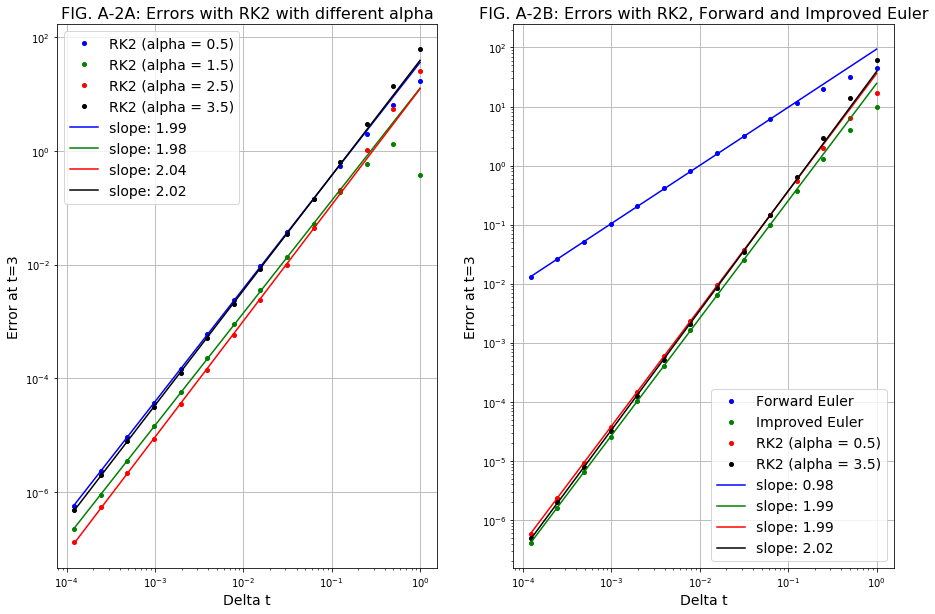

In [4]:
# FIGURE A-2


# Get the errors as a function of the timestep.
error_fe = []
error_ie = []
error_rk2_1 = []
error_rk2_2 = []
error_rk2_3 = []
error_rk2_4 = []
dt_array = []
y0 = 1.0
t0 = 0.0
t_max = 3
dt = 1.
alpha_1 = .5
alpha_2 = 1.5
alpha_3 = 2.5
alpha_4 = 3.5

while dt > 1.e-4:
    dt_array.append(dt)
    
    err1, err2 = approx_error_euler(y_ex, y0, t0, t_max, dt)
    err3 = approx_error_rk2(y_ex, y0, t0, t_max, dt, alpha_1)
    err4 = approx_error_rk2(y_ex, y0, t0, t_max, dt, alpha_2)
    err5 = approx_error_rk2(y_ex, y0, t0, t_max, dt, alpha_3)
    err6 = approx_error_rk2(y_ex, y0, t0, t_max, dt, alpha_4)
    
    error_fe.append(err1)
    error_ie.append(err2)
    error_rk2_1.append(err3)
    error_rk2_2.append(err4)
    error_rk2_3.append(err5)
    error_rk2_4.append(err6)
    
    dt *= 0.5

# print(dt_array)


# Get a linear fit to the errors using numpy.polyfit.
inifit = 3
fe_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(error_fe[inifit:]), 1)
ie_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(error_ie[inifit:]), 1)
rk2_1_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(error_rk2_1[inifit:]), 1)
rk2_2_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(error_rk2_2[inifit:]), 1)
rk2_3_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(error_rk2_3[inifit:]), 1)
rk2_4_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(error_rk2_4[inifit:]), 1)


fig2 = plt.figure(figsize = (15, 10))


# Left Panel: Error Comparison between solutions obtained with RK2 using various alpha.

ax1 = fig2.add_subplot(1, 2, 1)

ax1.loglog(dt_array, error_rk2_1, 'b.', label='RK2 (alpha = 0.5)', markersize = 8)
ax1.loglog(dt_array, error_rk2_2, 'g.', label='RK2 (alpha = 1.5)', markersize = 8)
ax1.loglog(dt_array, error_rk2_3, 'r.', label='RK2 (alpha = 2.5)', markersize = 8)
ax1.loglog(dt_array, error_rk2_4, 'k.', label='RK2 (alpha = 3.5)', markersize = 8)

ax1.loglog(dt_array, np.exp(rk2_1_fit[1]) * dt_array**(rk2_1_fit[0]), 'b-', label = 'slope: {:.2f}'.format(rk2_1_fit[0]))
ax1.loglog(dt_array, np.exp(rk2_2_fit[1]) * dt_array**(rk2_2_fit[0]), 'g-', label = 'slope: {:.2f}'.format(rk2_2_fit[0]))
ax1.loglog(dt_array, np.exp(rk2_3_fit[1]) * dt_array**(rk2_3_fit[0]), 'r-', label = 'slope: {:.2f}'.format(rk2_3_fit[0]))
ax1.loglog(dt_array, np.exp(rk2_4_fit[1]) * dt_array**(rk2_4_fit[0]), 'k-', label = 'slope: {:.2f}'.format(rk2_4_fit[0]))

ax1.set_xlabel('Delta t', fontsize = 14)
ax1.set_ylabel('Error at t=3', fontsize = 14)
ax1.set_title('FIG. A-2A: Errors with RK2 with different alpha', fontsize = 16)
ax1.legend(loc = 'best', fontsize = 14)
ax1.grid(True)


# Right Panel: Error comparison between Forward Euler, Improved Euler and RK2.

ax2 = fig2.add_subplot(1, 2, 2)

ax2.loglog(dt_array, error_fe, 'b.', label='Forward Euler', markersize = 8)
ax2.loglog(dt_array, error_ie, 'g.', label='Improved Euler', markersize = 8)
ax2.loglog(dt_array, error_rk2_1, 'r.', label='RK2 (alpha = 0.5)', markersize = 8)
ax2.loglog(dt_array, error_rk2_4, 'k.', label='RK2 (alpha = 3.5)', markersize = 8)

ax2.loglog(dt_array, np.exp(fe_fit[1]) * dt_array**(fe_fit[0]), 'b-', label = 'slope: {:.2f}'.format(fe_fit[0]))
ax2.loglog(dt_array, np.exp(ie_fit[1]) * dt_array**(ie_fit[0]), 'g-', label = 'slope: {:.2f}'.format(ie_fit[0]))
ax2.loglog(dt_array, np.exp(rk2_1_fit[1]) * dt_array**(rk2_1_fit[0]), 'r-', label = 'slope: {:.2f}'.format(rk2_1_fit[0]))
ax2.loglog(dt_array, np.exp(rk2_4_fit[1]) * dt_array**(rk2_4_fit[0]), 'k-', label = 'slope: {:.2f}'.format(rk2_4_fit[0]))

ax2.set_xlabel('Delta t', fontsize = 14)
ax2.set_ylabel('Error at t=3', fontsize = 14)
ax2.set_title('FIG. A-2B: Errors with RK2, Forward and Improved Euler', fontsize = 16)
ax2.legend(loc = 'best', fontsize = 14)
ax2.grid(True)


plt.show()

## Comments to Figure A-2

Figure A-2 shows how the errors obtained with the various methods vary as a function of the time step size.<br>

Figure A-2A is the plot of the errors for the RK2 method using different values for alpha. The slope of the lines, which corresponds to the order of convergence of the method, is roughly 2.<br>

Figure A-2B shows a comparison between the errors obtained with RK2 (two different values of alpha), forward Euler and improved Euler. The improved Euler method shows a  similar convergence to the RK2 methods.<br>

Note that the discrepancy of the error points with the linear fit increases with the time step size. I investigate a possible explanation for this in Appendix 1. Tweaking the parameter 'inifit', the points with larger discrepancy can be excluded from the calculation of the polynomial, thus bringing the value of the slope closer to the expected integer.


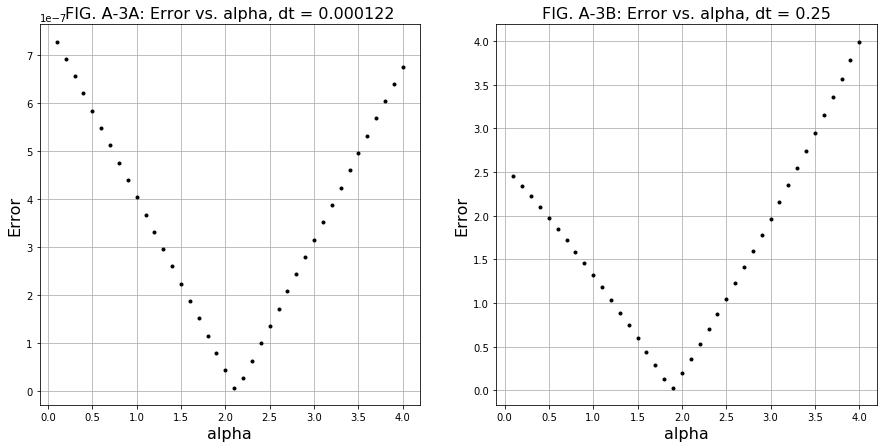

In [5]:
# FIGURE A-3

fig3 = plt.figure(figsize = (15, 7))


# Left Panel

# Get RK2 errors as a function of alpha.
dt = 0.0001220703125
y0 = 1.0
t0 = 0.0
t_max = 3
alpha = np.arange(0.1, 4.1, 0.1)
n_alpha = np.size(alpha)
E_rk2 = np.empty((n_alpha))
for i in range(n_alpha):
    E_rk2[i] = approx_error_rk2(y_ex, y0, t0, t_max, dt, alpha[i])

ax1 = fig3.add_subplot(1, 2, 1)

ax1.plot(alpha, E_rk2, 'k.', label='RK2')
ax1.set_xlabel('alpha', fontsize = 16)
ax1.set_ylabel('Error', fontsize = 16)
ax1.set_title("FIG. A-3A: Error vs. alpha, dt = %f" % (dt), fontsize = 16)
ax1.grid()


# Right Panel

# Get RK2 errors as a function of alpha.
dt = 0.25
y0 = 1.0
t0 = 0.0
t_max = 3
alpha = np.arange(0.1, 4.1, 0.1)
n_alpha = np.size(alpha)
E_rk2 = np.empty((n_alpha))
for i in range(n_alpha):
    E_rk2[i] = approx_error_rk2(y_ex, y0, t0, t_max, dt, alpha[i])

ax2 = fig3.add_subplot(1, 2, 2)

ax2.plot(alpha, E_rk2, 'k.', label='RK2')
ax2.set_xlabel('alpha', fontsize = 16)
ax2.set_ylabel('Error', fontsize = 16)
ax2.set_title("FIG. A-3B: Error vs. alpha, dt = %4.2f" % dt, fontsize = 16)

ax2.grid()

plt.show()

## Comments on Figure A-3

Figure A-3 shows how the error varies as a function of alpha. I tested a series of alpha ranging from 0.1 to 4, with an increase of 0.1.<br>

Considering a time step size of approximately 1.22e-4 (this value corresponds to the smallest one used 
in the plotting of Figure A-2), the value of alpha that minimises the error is 2.01. A value 
close to 2.5 was indeed expected by looking at Figure A-2A.<br>

Notice that considering a larger time step size (0.25, which corresponds to the third largest value used in figure A-2A) the value of alpha that minimises the error changes (Figure A-3B). This result is confirmed by looking at Figure A-2A. However, in the same figure is also possible to observe that for large time step sizes the discrepancy of the errors respect to the linear fit increases significantly, as pointed out before.<br>



# Coursework 1B - Implementing Taylor series methods

Consider the test case we saw in the first question above.

Write a general function (i.e. one not specific to this particular problem but that works with a generic RHS vector function $\boldsymbol{f}$) which time steps using the *Taylor series approach*, which we saw at the start of the Runge-Kutta section of Lecture 6, and apply it to this problem.

Your function should compute and return three numerical solutions: those that contain up to first, up to second and up to third order terms from the Taylor series expansion.

Use your solver to integrate this problem up to $t=2$, compute errors for each of the three numerical solutions at this time level, and perform a convergence analysis with respect to time step size.  

Estimate the slopes of the convergence lines in log-log space and hence confirm the orders of accuracy of the three methods. 

Comment on whether your convergence results give what would be expected given the local truncation error of your methods.

# Coursework 1B - Implementation

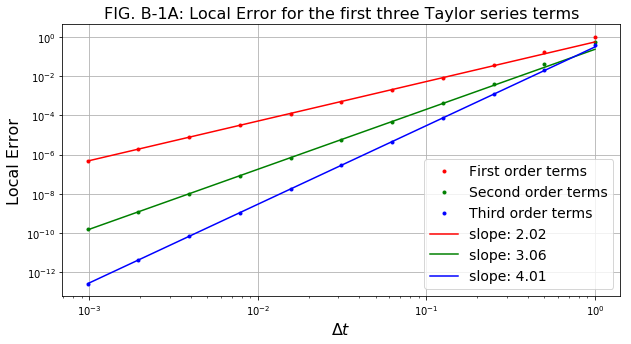

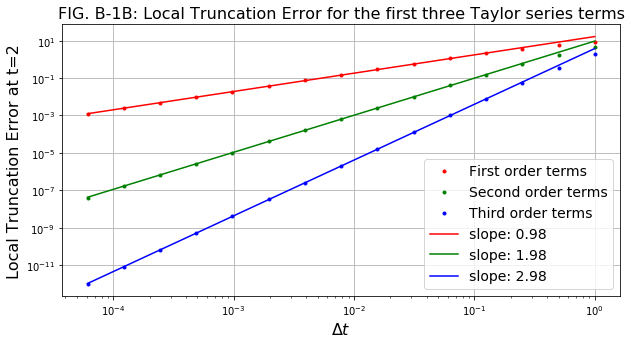

In [6]:
def TS_method(f, ft, fy, ftt, fyy, fyt, tn, yn, t_max, dt):
    """
    Implement Taylor series method.    
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation. Function of time and y.
    ft : function or vector function
        Partial derivative of f in time.
    fy : function or vector function
        Partial derivative of f in y.
    ftt : function or vector function
        Second partial derivative of f in time.
    fyy : function or vector function
        Second partial derivative of f in y.
    fyt : function or vector function
        Mixed partial derivative of f in y and time.
    tn : floating point
        Value of the variable t at the level n.
    yn : floating point or vector of floating point
        Conditions at time livel n.
    t_max : floating point
        End time.
    dt : floating point
        Time step size.

    Returns
    -------
    t_all : numpy array
        Values of the variable t.
    y1_all : numpy array
        First order term solution.
    y2_all : numpy array
        Second order term solution.
    y3_all : numpy array
        Third order term solution.
    """
    t_all = [tn]
    y1 = yn 
    y2 = yn
    y3 = yn
    y1_all = [yn]
    y2_all = [yn]
    y3_all = [yn]
    while tn < t_max:
        y1 = y1 + dt * f(tn, y1)
        y2 = y2 + dt * f(tn, y2) + dt**2/np.math.factorial(2) * (ft(tn, y2)+f(tn, y2)*fy(tn, y2))
        y3 = y3 + dt * f(tn, y3) + dt**2/np.math.factorial(2) * (ft(tn, y3)+f(tn, y3)*fy(tn, y3)) + \
                                   dt**3/np.math.factorial(3) * (6*tn + 3*tn**2 + y3 + tn**3)
        y1_all.append(y1)
        y2_all.append(y2)
        y3_all.append(y3)
        tn = tn + dt
        t_all.append(tn)
    return np.array(t_all), np.array(y1_all), np.array(y2_all), np.array(y3_all)


def ft(t, y):
    """
    Partial derivative of f in time.
    """
    return 3*t**2


def fy(t, y):
    """
    Partial derivative of f in y.
    """
    return 1


def ftt(t, y):
    """
    Second partial derivative of f in time.
    """
    return 6*t


def fyy(t, y):
    """
    Second partial derivative of f in y.
    """
    return 0


def fyt(t,y):
    """
    Mixed partial derivative of f in y and time.
    """
    return 0


# Evaluate first, second and third order terms in a time range. 
t0 = 0
y0 = y_ex(t0)
dt = 1e-1
t_max = 2
t_all, y1_all, y2_all, y3_all = TS_method(f, ft, fy, ftt, fyy, fyt, t0, y0, t_max, dt)

# Evaluate analytical solution in the same time range.
yex_all = y_ex(t_all)


# # Plot the various solutions.
# fig, ax1 = plt.subplots(1, 1, figsize = (8,8))
# ax1.plot(t_all, yex_all, 'k', label = 'Analytical')
# ax1.plot(t_all, y1_all, 'r.', label = 'First order terms')
# ax1.plot(t_all, y2_all, 'g.', label = 'Second order terms')
# ax1.plot(t_all, y3_all, 'b.', label = 'Third order terms')
# plt.grid()
# plt.show()




# Get the Local Errors (error committed in a single step,
# assuming perfect knowledge of the starting point).
t0 = 0
y0 = y_ex(t0)
t_max = 2
err_y1_all = []
err_y2_all = []
err_y3_all = []
dt_array = []
dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)
    t_all, y1_all, y2_all, y3_all = TS_method(f, ft, fy, ftt, fyy, fyt, t0, y0, t_max, dt)
    err_y1 = abs(y1_all[1] - y_ex(t0+dt))
    err_y1_all.append(err_y1)
    err_y2 = abs(y2_all[1] - y_ex(t0+dt))
    err_y2_all.append(err_y2)
    err_y3 = abs(y3_all[1] - y_ex(t0+dt))
    err_y3_all.append(err_y3)
    dt *= 0.5

# Plot the local errors
fig1, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.loglog(dt_array, err_y1_all, 'r.', label = 'First order terms')
ax1.loglog(dt_array, err_y2_all, 'g.', label = 'Second order terms')
ax1.loglog(dt_array, err_y3_all, 'b.', label = 'Third order terms')

# Get a linear fit to the errors using numpy.polyfit.
inifit = 2
y1_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(err_y1_all[inifit:]), 1)
y2_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(err_y2_all[inifit:]), 1)
y3_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(err_y3_all[inifit:]), 1)

# Plot the linear fit.
ax1.loglog(dt_array, np.exp(y1_fit[1]) * dt_array**(y1_fit[0]), 'r-', label = 'slope: {:.2f}'.format(y1_fit[0]))
ax1.loglog(dt_array, np.exp(y2_fit[1]) * dt_array**(y2_fit[0]), 'g-', label = 'slope: {:.2f}'.format(y2_fit[0]))
ax1.loglog(dt_array, np.exp(y3_fit[1]) * dt_array**(y3_fit[0]), 'b-', label = 'slope: {:.2f}'.format(y3_fit[0]))
ax1.legend(loc = 'best', fontsize = 14)
ax1.set_xlabel('$\Delta t$', fontsize = 16)
ax1.set_ylabel('Local Error', fontsize = 16)
ax1.set_title('FIG. B-1A: Local Error for the first three Taylor series terms', fontsize = 16)
plt.grid()

plt.show()




# Get the Local Truncation Errors.
t0 = 0
y0 = y_ex(t0)
t_max = 2
err_y1_all = []
err_y2_all = []
err_y3_all = []
dt_array = []
dt = 1.
while dt > 5.e-5:
    dt_array.append(dt)
    t_all, y1_all, y2_all, y3_all = TS_method(f, ft, fy, ftt, fyy, fyt, t0, y0, t_max, dt)
    err_y1 = abs(y1_all[-1] - y_ex(t_max))
    err_y1_all.append(err_y1)
    err_y2 = abs(y2_all[-1] - y_ex(t_max))
    err_y2_all.append(err_y2)
    err_y3 = abs(y3_all[-1] - y_ex(t_max))
    err_y3_all.append(err_y3)
    dt *= 0.5

# Plot the errors
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.loglog(dt_array, err_y1_all, 'r.', label = 'First order terms')
ax1.loglog(dt_array, err_y2_all, 'g.', label = 'Second order terms')
ax1.loglog(dt_array, err_y3_all, 'b.', label = 'Third order terms')

# Get a linear fit to the errors using numpy.polyfit.
inifit = 2
y1_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(err_y1_all[inifit:]), 1)
y2_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(err_y2_all[inifit:]), 1)
y3_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(err_y3_all[inifit:]), 1)

# Plot the linear fit.
ax1.loglog(dt_array, np.exp(y1_fit[1]) * dt_array**(y1_fit[0]), 'r-', label = 'slope: {:.2f}'.format(y1_fit[0]))
ax1.loglog(dt_array, np.exp(y2_fit[1]) * dt_array**(y2_fit[0]), 'g-', label = 'slope: {:.2f}'.format(y2_fit[0]))
ax1.loglog(dt_array, np.exp(y3_fit[1]) * dt_array**(y3_fit[0]), 'b-', label = 'slope: {:.2f}'.format(y3_fit[0]))
ax1.legend(loc = 'best', fontsize = 14)
ax1.set_xlabel('$\Delta t$', fontsize = 16)
ax1.set_ylabel('Local Truncation Error at t=2', fontsize = 16)
ax1.set_title('FIG. B-1B: Local Truncation Error for the first three Taylor series terms', fontsize = 16)
plt.grid()
plt.show()



## Comments on Figure B-1

We can obtain the exact solution to the problem with the Taylor series expansion:

$$ y_{n+1} = y_n + \Delta t\, y'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4)$$

The first order solution is given by dropping the terms with order higher than one:

$$ y_{n+1} = y_n + \Delta t\, y'_n$$

The Local Error (LE) is defined as the error after one step, starting from exact initial conditions. For the first order solution the LE is given by:

$$\text{LE} = \frac{\Delta t^2}{2!}y''_n + \mathcal{O}(\Delta t^3)$$

The leading term of the LE has $\Delta t^2$ in it, the LE will therfore be mostly proportional to the time step size squared. This is indeed what we observe in Figure B-1A. Same dicussion can be done for the second and third order solutions:

$$ \text{Second order solution:} \;\;\;\; y_{n+1} = y_n + \Delta t\, y'_n + \frac{\Delta t^2}{2!}y''_n$$

$$ \text{Third order solution:} \;\;\;\; y_{n+1} = y_n + \Delta t\, y'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n$$

The LE in these cases will have in it $\Delta t^3$, for the second order solutions, and $\Delta t^4$ for the third order solution. The LE of the second order solution will therefore be proportional to $\Delta t^3$. The 
LE of the thrid order solution will be proportional to $\Delta t^4$. In Figure B-1A these proportionalities are shown.<br>

The Local Truncation Error (LTE) is calculated by plugging the exact solution into the numerical scheme. According to our first order numerical solution we have:

$$ y_{n+1} = y_n + \Delta t\, y'_n \implies \frac{y_{n+1} - y_n}{\Delta t} = y'_n$$

Starting from the exact solution we obtain:

$$ y_{n+1} = y_n + \Delta ty'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4) \implies$$

$$ \frac{y_{n+1} - y_n}{\Delta t} = y'_n + \frac{\Delta t}{2!}y''_n + \frac{\Delta t^2}{3!}y'''_n + \mathcal{O}(\Delta t^3) $$

The LTE is therefore given by:

$$ LTE = \frac{\Delta t}{2!}y''_n + \frac{\Delta t^2}{3!}y'''_n + \mathcal{O}(\Delta t^3)$$

The leading order term of the LTE is proportional to $\Delta t$, as we  can see in Figure B-1B.

With a similar procedure, it is possible to obtain the LTE for the second and third order solutions. For example, for the second order solution we have:

$$ \frac{y_{n+1} - y_n}{\Delta t} - y'_n = \frac{\Delta t}{2!} y''_n $$

While from the exact solution we get:

$$ \frac{y_{n+1} - y_n}{\Delta t} - y'_n = \frac{\Delta t}{2!}y''_n + \frac{\Delta t^2}{3!}y'''_n + \mathcal{O}(\Delta t^3)$$

The difference of the two equations gives us the LTE for the second order method:

$$ LTE = \frac{\Delta t^2}{3!}y'''_n + \mathcal{O}(\Delta t^3)$$

The LTE of the second order method is mostly proportional to $\Delta t^2$, as shown in Figure B-1B.


# Coursework 1C - Implementing the Adams-Moulton 3-step method (AM3)

Repeat the derivation of AB2 (we saw in lecture 6) and AB4 (in homework 6, question 5) for the case of AM3.

That is, derive the coefficients that go into a matrix system for AM3's $b$ parameters. 

Invert the system using a linear solver and verify that your parameters match with those that were given for AM3 in the lecture.


Rather than attempting to implement the full *implicit* version of this Adams-Mouton scheme, combine it with AB4 as part of a **predictor-corrector pair** - we can call the resulting scheme AM3-PC.

Compare the accuracy of your solver with the RK4 and AB4 methods on the test problem 

$$y'(t) = y,\;\;\; y(0)=1,$$

where you can evaluate the error at time $t = 2\pi$.

Based upon your results, what is the approximate ratio between the errors you obtain with AB4 and AM3-PC for this problem.

How could you have estimated this ratio of errors before implementing and running the two codes.

**Hint:** 

In your derivation you might find it helpful to consider

$$f(t,y(t)):=P_{N+1}(t) = t (t + \Delta t) \dots (t + N\Delta t),$$ 

as well as the time levels given by

$$t_{n+1} = 0,\;\;\;\; 
t_n = -\Delta t, \;\;\;\; 
t_{n-1} = -2\Delta t,\;\;\;\; 
t_{n-2} = -3\Delta t, \ldots$$



Note also that you can check your coefficients against those given for AM3 in lecture 6:

$$k=3\; \text{(3-step AM scheme):} \;\;\;  y_{n+1} = y_{n} + \frac{\Delta t}{24}\; (
9 f_{n+1} + 19 f_{n} - 5 f_{n-1}  + f_{n-2}).$$

Even if you can't derive the correct matrix system which yields these coefficients, you can still make use of them in the implementation that makes up the final parts of the question.


# Coursework 1C - Implementation

## Derivation of the Adams-Moulton 3-step method (AM3)

The general relation used to define linear multi-step (LMS) methods is:

<br>

$$\sum_{j=0}^k \alpha_j \, y_{n+j} = \Delta t \sum_{j=0}^k \beta_j \, f(t_{n+j},y_{n+j})$$

<br>

The Adams methods are characterized by having $\alpha_k=1$, $\alpha_{k-1}=-1$ and all the other $\alpha$ parameters equal to zero.<br> The $\beta$ parameters are obtained maximizing the accuracy of the method of relative order. In explicit methods, defined as Adams-Bashforth methods, $\beta_k$ is set equals to zero. In implicit methods, classified as Adams-Moulton methods, $\beta_k$ is different than zero and has to be calculated as the other $\beta$ parameters.<br>

In order to derive the Adam-Moulton 3-step method (AM3), we can first write the equation above with the explicit $\alpha$ and $\beta$ parameters.<br>

\begin{align*}
  \;\;\;\; y_{n+3} - y_{n+2} \, & = \Delta t \left( b_0 \, f_n + b_1 \, f_{n+1} + b_2 \, f_{n+2} + b_3 \, f_{n+3} \right) \;\;\;\; \implies \;\;\;\; \\[10pt]
  \;\;\;\; y_{n+1} - y_{n} \, & = \Delta t \left( b_0 \, f_{n-2} + b_1 \, f_{n-1} + b_2 \, f_{n} + b_3 \, f_{n+1} \right) \;\;\;\; \;\;\;\;
\end{align*}

The following equation has to be true:

$$\int_{t_{n}}^{t_{n+1}} {f}(t,{y}(t))\, dt = \Delta t \left( b_0 \, f_{n-2} + b_1 \, f_{n-1} + b_2 \, f_{n} + b_3 \, f_{n+1} \right)$$

We can consider:

$$f(t,y(t)):=P_{N+1}(t) = t (t + \Delta t) \dots (t + N\Delta t)$$

and that the time levels are given by:

$$t_{n+1} = 0,\;\;\;\; 
t_n = -\Delta t, \;\;\;\; 
t_{n-1} = -2\Delta t,\;\;\;\; 
t_{n-2} = -3\Delta t, \ldots$$

<br>

We now need to satisfy the following conditions:

\begin{align*}
f(t):= 1: \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} \, dt  = \Delta t \\[5pt]
RHS &= \Delta t \left( b_3 + b_2 + b_1 + b_0 \right)\\[15pt]
%
f(t):= t: \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} t\, dt  = \frac{\Delta t^2}{2}  \\[5pt]
RHS &= \Delta t \left( b_3 f(\Delta t) + b_2 f(0) + b_1 f(-\Delta t) + b_0 f(-2\Delta t)\right)\\[5pt]
&= \Delta t \left[  b_3\Delta t  + b_1(-\Delta t)  + b_0(-2\Delta t) \right] \\[5pt]
&= \Delta t \left[  \Delta t  (b_3 -b_1 -2b_0) \right] \\[5pt]
&= \Delta t^2 \left( b_3 -b_1 -2b_0 \right)\\[15pt]
%
f(t):=  t(t+\Delta t): \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} f(t)\, dt  = 5\frac{\Delta t^3}{6}  \\[5pt]
RHS &= \Delta t \left( b_3 f(\Delta t) + b_2 f(0) + b_1 f(-\Delta t) + b_0 f(-2\Delta t)\right)\\[5pt]
&= \Delta t \left[ b_3 \Delta t (\Delta t +\Delta t) + b_0 (-2\Delta t)(-2\Delta t +\Delta t) \right] \\[5pt]
&= \Delta t \left[ b_3 \Delta t (2\Delta t) + b_0 (-2\Delta t)(-\Delta t) \right] \\[5pt]
&= \Delta t \left( 2b_3 \Delta t^2 + 2b_0 \Delta t^2 \right) \\[5pt]
&= \Delta t^3 \left[ 2b_3  + 2b_0  \right] \\[15pt]
%
f(t):=  t(t+\Delta t)(t+2\Delta t): \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} f(t)\, dt  = 9\frac{\Delta t^4}{4}  \\[5pt]
RHS &= \Delta t \left( b_3 f(\Delta t) + b_2 f(0) + b_1 f(-\Delta t) + b_0 f(-2\Delta t)\right)\\[5pt]
&= \Delta t \left[ b_3 \Delta t (\Delta t +\Delta t)(\Delta t + 2\Delta t) \right] \\[5pt]
&= \Delta t \left[ b_3 \Delta t (2\Delta t)(3\Delta t) \right] \\[5pt]
&= \Delta t \left( 6 b_3 \Delta t^3 \right) \\[5pt]
&= \Delta t^4 \left( 6 b_3 \right)
\end{align*}

We can write the conditions in the form of a linear system, changing the order of the coefficients to get an upper triangular matrix:

$$
\begin{pmatrix}
1 & 1 & 1 & 1 \\
0 & -1 & -2 & 1 \\
0 & 0 & 2 & 2 \\
0 & 0 & 0 & 6
\end{pmatrix}
\begin{pmatrix}
b_2\\
b_1\\
b_0\\
b_3
\end{pmatrix}
=
\begin{pmatrix}
1\\
1/2\\
5/6\\
9/4
\end{pmatrix}
$$

<br>

[Pictures of the handwritten derivation are uploaded in the Github folder, files pic_1.jpeg and pic_2.jpeg]

In [7]:
# Compute the b coefficients and verify that they are correct.

LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., 1.], [0., 0., 2., 2.], [0., 0., 0., 6.] ])
RHS_b = np.array([1., 1./2., 5./6., 9./4.])
AM3_b = np.linalg.solve(LHS_A, RHS_b)
print('Calculated AM3 coefficients: ', AM3_b)
print('Coefficients are correct: ', np.allclose(AM3_b, np.array([ 19./24., -5./24., 1./24., 9./24. ])))


Calculated AM3 coefficients:  [ 0.79166667 -0.20833333  0.04166667  0.375     ]
Coefficients are correct:  True


Ratio between AB4 and AM3PC errors:
 [0.41748456 0.70623615 0.97189191 0.9949791  0.99891545 0.99992734
 0.99999002 0.99999853 0.99999972 0.99999808 0.99999988]


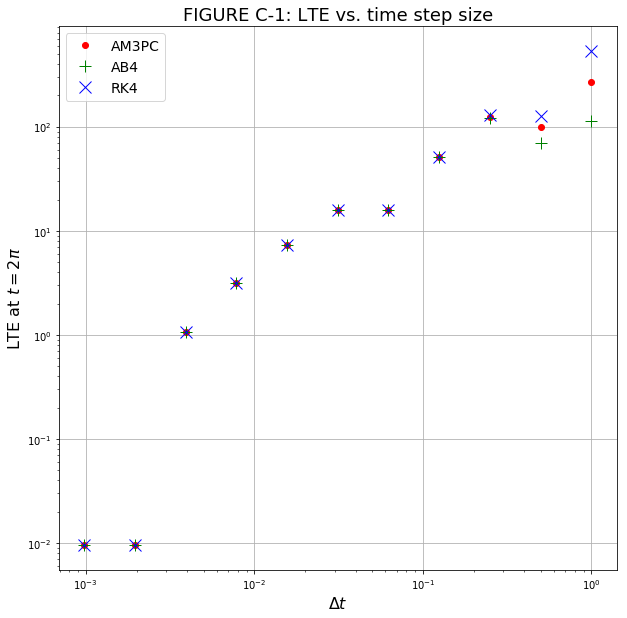

In [8]:
# Combine AB4 with AM3 to get a predictor-corrector pair, AM3-PC.


def f(t, y):
    """
    RHS function.
    """
    val = y
    return val


def y_ex(t):
    """
    Analytical solution considering the RHS function defined in f.
    """
    return np.exp(t)


def AM3PC(f, y0, t0, t_max, dt):
    """
    Implement the Adams-Moulton 3-step method.
    Adopt a predictor-corrector approach with AB4 as predictor.
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation.
    y0 : floating point or vector of floating point
        Starting conditions.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step size.

    Returns
    -------
    y_all : numpy array
        Values of the solution.
    t_all : numpy array
        Time values where solution is evaluated.
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    
    # AM3 and AB4 are not self-starting. I use improved Euler to get the first steps.
    # Note that improved Euler is itself a predictor (forward Euler) corrrector method.
    for n in range(3):
        y_fe = y + dt*f(t, y)  # predictor
        y = y + 0.5 * dt * ( f(t, y) + f(t + dt, y_fe) )  # corrector
        y_all.append(y)
        t = t + dt
        t_all.append(t)

#     # Another option is to start with RK4.
#     for n in range(3):
#         k1 = dt*f(t, y)
#         k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
#         k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
#         k4 = dt*f(t + dt, y + k3)
#         y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
#         y_all.append(y)
#         t = t + dt
#         t_all.append(t)
    
    # Compute AM3 coefficients.
    LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., 1.], [0., 0., 2., 2.], [0., 0., 0., 6.] ])
    RHS_b = np.array([1., 1./2., 5./6., 9./4.])
    AM3_b = np.linalg.solve(LHS_A, RHS_b)

    # Compute AB4 coefficients.
    LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
    RHS_b = np.array([1., 1./2., 5./6., 9./4.])
    AB4_b = np.linalg.solve(LHS_A, RHS_b)
    
    # Run the while loop.
    while t < t_max:
        y_ab4 = y + dt * ( AB4_b[0]*f(t, y_all[-1]) + AB4_b[1]*f(t-dt, y_all[-2]) 
                          + AB4_b[2]*f(t-2*dt, y_all[-3]) + AB4_b[3]*f(t-3*dt, y_all[-4]))  # predictor
        y = y + dt * ( AM3_b[0]*f(t, y_all[-1]) + AM3_b[1]*f(t, y_all[-2]) + AM3_b[2]*f(t, y_all[-3])
                          + AM3_b[3]*f(t, y_ab4) )  # corrector
        y_all.append(y)
        t = t + dt
        t_all.append(t)

    return np.array(y_all), np.array(t_all)


def RK4(f, y0, t0, t_max, dt):
    """
    Implement RK4 method.
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation.
    y0 : floating point or vector of floating point
        Starting conditions.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step size.

    Returns
    -------
    y_all : numpy array
        Values of the solution.
    t_all : numpy array
        Time values where solution is evaluated.
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


def AB4(f, y0, t0, t_max, dt):
    """
    Implement Adams-Bashforth 4-spet method.
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation.
    y0 : floating point or vector of floating point
        Starting conditions.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step size.

    Returns
    -------
    y_all : numpy array
        Values of the solution.
    t_all : numpy array
        Time values where solution is evaluated.
    """
    
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]

    # Start the method using improved Euler.
    for n in range(3):
        y_fe = y + dt*f(t, y)  # predictor
        y = y + 0.5 * dt * ( f(t, y) + f(t + dt, y_fe) )  # corrector
        y_all.append(y)
        t = t + dt
        t_all.append(t)

#     # Start the method using RK4.
#     for n in range(3):
#         k1 = dt*f(t, y)
#         k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
#         k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
#         k4 = dt*f(t + dt, y + k3)
#         y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
#         y_all.append(y)
#         t = t + dt
#         t_all.append(t)

    # Compute AB4 coefficients.
    LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
    RHS_b = np.array([1., 1./2., 5./6., 9./4.])
    AB4_b = np.linalg.solve(LHS_A, RHS_b)

    # Run AB4 till t_max.
    while t < t_max:
        y = y + dt * (AB4_b[0]*f(t, y_all[-1]) + AB4_b[1]*f(t-dt, y_all[-2]) 
                    + AB4_b[2]*f(t-2*dt, y_all[-3]) + AB4_b[3]*f(t-3*dt, y_all[-4]))
        y_all.append(y)
        t = t + dt
        t_all.append(t)

    return np.array(y_all), np.array(t_all)


# # Test numerical vs analytical solution.

# y0 = 1
# t0 = 0
# t_max = 5
# dt = 1.
# y_IE, t_all = improved_euler(f, y0, t0, t_max, dt)
# y_Ex = y_ex(t_all)  # analytical solution
# y_AM3PC, t_all = AM3PC(f, y0, t0, t_max, dt)
# y_RK4, t_all = RK4(f, y0, t0, t_max, dt)
# y_AB4, t_all = AB4(f, y0, t0, t_max, dt)
# plt.plot(t_all, y_Ex, 'k.')
# # plt.plot(t_all, y_IE, 'b.')
# plt.plot(t_all, y_AM3PC, 'g.', markersize = 10)
# plt.plot(t_all, y_RK4, 'r.')
# plt.plot(t_all, y_AB4, 'c.')
# plt.show()


# Get the errors relative to analytic solution.
t0 = 0
y0 = y_ex(t0)
t_max = 2*pi
err_AM3PC_all = []
err_AB4_all = []
err_RK4_all = []
dt_array = []
dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)

    y_AM3PC, t_all = AM3PC(f, y0, t0, t_max, dt)
    err_AM3PC = abs(y_AM3PC[-1] - y_ex(t_max))
    err_AM3PC_all.append(err_AM3PC)

    y_AB4, t_all = AB4(f, y0, t0, t_max, dt)
    err_AB4 = abs(y_AB4[-1] - y_ex(t_max))
    err_AB4_all.append(err_AB4)

    y_RK4, t_all = RK4(f, y0, t0, t_max, dt)
    err_RK4 = abs(y_RK4[-1] - y_ex(t_max))
    err_RK4_all.append(err_RK4)

    dt *= 0.5


# Get ratio between the errors of AM3PC and AB4.
err_AB4_all = np.array(err_AB4_all)
err_AM3PC_all = np.array(err_AM3PC_all)
ratio = err_AB4_all / err_AM3PC_all
print('Ratio between AB4 and AM3PC errors:\n',ratio)


# Plot the errors.

fig, ax1 = plt.subplots(1, 1, figsize = (10, 10))
ax1.loglog(dt_array, err_AM3PC_all, 'r.', label = 'AM3PC', markersize = 12)
ax1.loglog(dt_array, err_AB4_all, 'g+', label = 'AB4', markersize = 12)
ax1.loglog(dt_array, err_RK4_all, 'bx', label = 'RK4', markersize = 12)
ax1.set_title("FIGURE C-1: LTE vs. time step size", fontsize = 18)
ax1.set_xlabel('$\Delta t$', fontsize = 16)
ax1.set_ylabel("LTE at $t=2\pi$", fontsize = 16)
ax1.legend(loc = 'best', fontsize = 14)
plt.grid()

plt.show()


## Comments on Figure C-1

The three methods used, AM3-PC, AB4 and RK4, give very similar errors, except for few points that correspond to large time step size. The ratio between the errors relative to AB4 and AM3-PC is approximately equals to one.

# Comments on the errors of AM3 and AB4

The ratio of the errors obtained with AM3 and AB4 is roughly equals to one.
In order to infer that, and the order of accuracy of the two methods, without actually testing them, we can adopt the following approach.

We start from the general formula that defines the LMS:

$$\sum_{j=0}^k \alpha_j \, y_{n+j} = \Delta t \sum_{j=0}^k \beta_j \, f(t_{n+j},y_{n+j})$$

We use it to define the LTE related to these methods, substituting the numerical solution with the exact solution and scaling with $\Delta t$:

$$LTE := \frac{1}{\Delta t}\left[ \sum_{j=0}^k \alpha_j \, y(t_{n+j}) - \Delta t \sum_{j=0}^k \beta_j \, y'(t_{n+j})\right]$$

We now use the Taylor saries and its derivative to derive the following equation:

\begin{align*}
LTE = \frac{1}{\Delta t}\left( \sum_{j=0}^k \alpha_j \right)y(t_n)
+ \left( \sum_{j=0}^k (j\alpha_j - \beta_j)\right)y'(t_n)
& + \Delta t\left( \sum_{j=0}^k \left(\frac{1}{2}j^2\alpha_j - j\beta_j\right)\right)y''(t_n)\\[10pt]
+ \ldots
& + \Delta t^{q-1}\left( \sum_{j=0}^k \left(\frac{1}{q!}j^q\alpha_j - \frac{1}{(q-1)!}j^{q-1}\beta_j\right)\right)y^{(q)}(t_n) \\[10pt]
& + \ldots.
\end{align*}

Plugging the coefficients of AB4 and AM3 in the above equation (as done in Lecture 6) we realise that the first five terms are equal to zero. For both these methods the LTE will be therefore:

\begin{align*}
LTE = \Delta t^{4}\left( \sum_{j=0}^k \left(\frac{1}{5!}j^q\alpha_j - \frac{1}{(4)!}j^{5}\beta_j\right)\right)y'''''(t_n) + \ldots + \Delta t^{q-1}\left( \sum_{j=0}^k \left(\frac{1}{q!}j^q\alpha_j - \frac{1}{(q-1)!}j^{q 1}\beta_j\right)\right)y^{(q)}(t_n) + \ldots \\[10pt]
\end{align*}

The leading order term of the LTE is proportional to $\Delta t^{4}$. Both AB4 and AM3 are fourth order accurate.<br>

The calculation of the terms of the above equation is repeated below. Note that for Adams methods the first two terms are always equal to zero. The fourth order term (sixth term in the above equation) for AB4 and AM3 are different. In terms of absolute values, the fourth order term of AB4 is one order of magnitude bigger than the one relative to AM3. Consequently, I would expect that the LTE of AB4 is bigger than the LTE of AM3. The ratio obtained above is instead close to one. This might be due to the fact that instead of implementing the implicit form of AM3, a predictor-corrector approach has been used, with AB4 as predictor.


In [9]:

#AB4 coefficients
AB4_alphas = np.array([0., 0., 0., -1., 1.])
AB4_betas = np.array([-9./24., 37./24, -59./24., 55./24., 0.])


#AM3 coefficients
AM3_alphas = np.array([0., 0., -1., 1.])
AM3_betas = np.array([1./24., -5./24.,  19./24., 9./24.])


# first order terms
print('\nFirst-order coefficient for AB4: ',np.sum([ (0.5*j**2*AB4_alphas[j] - j*AB4_betas[j]) for j in range(len(AB4_alphas))]))
print('First-order coefficient for AM3: ',np.sum([ (0.5*j**2*AM3_alphas[j] - j*AM3_betas[j]) for j in range(len(AM3_alphas))]))

# second order terms
print('\nSecond-order coefficient for AB4: ',np.sum([ (1./factorial(3))*j**3*AB4_alphas[j] - (1./factorial(2)*j**2*AB4_betas[j]) for j in range(len(AB4_alphas))]))
print('Second-order coefficient for AM3: ',np.sum([ (1./factorial(3))*j**3*AM3_alphas[j] - (1./factorial(2)*j**2*AM3_betas[j]) for j in range(len(AM3_alphas))]))

# third order terms
print('\nThird-order coefficient for AB4: ',np.sum([ (1./factorial(4))*j**4*AB4_alphas[j] - (1./factorial(3)*j**3*AB4_betas[j]) for j in range(len(AB4_alphas))]))
print('Third-order coefficient for AM3: ',np.sum([ (1./factorial(4))*j**4*AM3_alphas[j] - (1./factorial(3)*j**3*AM3_betas[j]) for j in range(len(AM3_alphas))]))

# fourth order terms
print('\nFourth-order coefficient for AB4: ',np.sum([ (1./factorial(5))*j**5*AB4_alphas[j] - (1./factorial(4)*j**4*AB4_betas[j]) for j in range(len(AB4_alphas))]))
print('Fourth-order coefficient for AM3: ',np.sum([ (1./factorial(5))*j**5*AM3_alphas[j] - (1./factorial(4)*j**4*AM3_betas[j]) for j in range(len(AM3_alphas))]))

# fifth order terms
print('\nFifth-order coefficient for AB4: ',np.sum([ (1./factorial(6))*j**6*AB4_alphas[j] - (1./factorial(5)*j**5*AB4_betas[j]) for j in range(len(AB4_alphas))]))
print('Fifth-order coefficient for AM3: ',np.sum([ (1./factorial(6))*j**6*AM3_alphas[j] - (1./factorial(5)*j**5*AM3_betas[j]) for j in range(len(AM3_alphas))]))



First-order coefficient for AB4:  0.0
First-order coefficient for AM3:  4.440892098500626e-16

Second-order coefficient for AB4:  0.0
Second-order coefficient for AM3:  0.0

Third-order coefficient for AB4:  -1.7763568394002505e-15
Third-order coefficient for AM3:  4.440892098500626e-16

Fourth-order coefficient for AB4:  0.3486111111111132
Fourth-order coefficient for AM3:  -0.026388888888888795

Fifth-order coefficient for AB4:  0.678472222222223
Fifth-order coefficient for AM3:  -0.04513888888888884


# Coursework 1D - Implementing backward Euler using a nonlinear system solver

In the lecture 5 homework (question "circular orbits") we considered the problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x
\end{align*} 

with initial conditions $x(0)=1,\; y(0)=0$.  

We saw how the forward and improved Euler methods performed on this problem.

Recall that the exact solution's trajectory in $(x,y)$ space should map out a circle, but forward Euler's orbit was found to rapidly increase in diameter.

Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$. 

To do this you will need to call a nonlinear system solver, make use of one of the ones that we saw in lecture 4.

Run your code for the above problem and comment on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

Based on your observations implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler. 

Demonstrate this improvement based upon the "conservation law" 

$$ r(t) := \sqrt{x(t)^2 + y(t)^2}, $$

which for the exact solution maintains its value at $r(0)$.

# Coursework 1D - Implementation

## Implementing the backward Euler method

To implement the backward Euler method I use a system solver provided in the Scipy library, scipy.optimize.root. To find the solution of the root problem, scipy.optimize.root can adopt various methods, the modified Powell method is utilized by default.

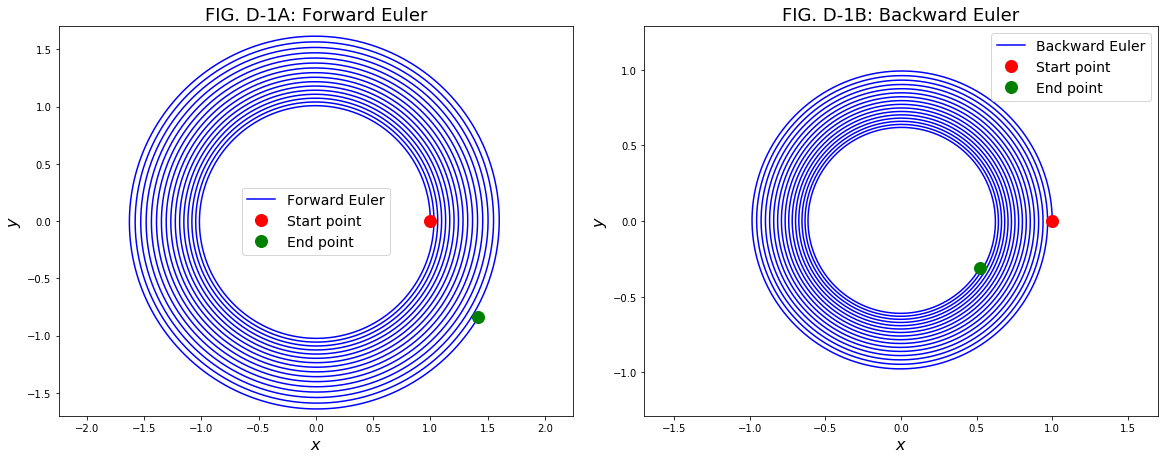

In [10]:
def f(t, u):
    """
    RHS function.
    """
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f


def backward_euler(f, y0, t0, t_max, dt):
    """
    Backward Euler method.
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation.
    y0 : floating point or vector of floating point
        Starting conditions.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step size.

    Returns
    -------
    y_all : numpy array
        Values of the solution.
    t_all : numpy array
        Time values where solution is evaluated.
    """

    def bf(x):
        """
        Arrange the backward Euler formula as a root problem.
        """ 
        bf = np.zeros(len(x))
        bf = -x + y + dt * (f(t+dt, x))
        return bf

    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y_gue = y + dt*f(t, y)  # FE to get a guess
        x0 = np.array(y_gue)
        sol = sop.root(bf, x0)
        y = sol.x
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)




# Make the plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.tight_layout(w_pad=4)

dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
t_max = 100.
u, t = forward_euler(f, u0, t0, t_max, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FIG. D-1A: Forward Euler', fontsize=18)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
t_max = 100.
u, t = backward_euler(f, u0, t0, t_max, dt)
ax2.plot(u[:,0], u[:,1], 'b', label = 'Backward Euler')
ax2.plot(u[0,0], u[0,1], 'ro', label = 'Start point', markersize = 12)
ax2.plot(u[-1,0], u[-1,1], 'go', label = 'End point', markersize = 12)
ax2.set_xlabel('$x$', fontsize = 16)
ax2.set_ylabel('$y$', fontsize = 16)
ax2.set_title('FIG. D-1B: Backward Euler', fontsize = 18)
ax2.axis('equal')
ax2.legend(loc = 'best', fontsize = 14)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7);



## Comments on Figure D-1

Using forward Euler, we obtain a solution that spirals out of the circular orbit. Applying backward Euler we obtain the opposite, with the solution spiraling inward, although remaining closer to the cirular orbit. Looking at figure D-1 we could therefore think that backward Euler is slightly more accurate than forward Euler.<br>

Based on this result, another two-level scheme that could be used in order to obtain a better solution is the trapezoidal method. This method is obtained adding forward and backward Euler together. Observing the figure D-1, it seems that the errors obtained with the two methods have approximately the same magnitude and the opposite sign. Adding the two solutions together should therefore cancel the errors out, resulting in a more accurate method.

## Implementation of the trapezoidal method

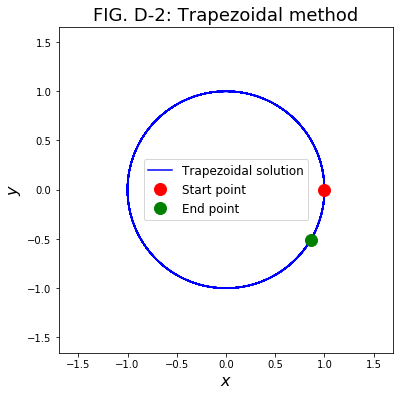

In [11]:
def trapezoidal(f, y0, t0, t_max, dt):
    """
    Trapezoidal method.
    
    Parameters
    ----------
    f : function or vector function
        RHS of the equation.
    y0 : floating point or vector of floating point
        Sarting conditions.
    t0 : floating point
        Starting time.
    t_max : floating point
        End time.
    dt : floating point
        Time step size.

    Returns
    -------
    y_all : numpy array
        Values of the solution.
    t_all : numpy array
        Time values where solution is evaluated.
    """

    def bf(x):
        """
        Arrange the backward Euler formula as a root problem.
        """ 
        bf = np.zeros(len(x))
        bf[0] = -x[0] + y[0] + dt * (f(t+dt, x)[0])
        bf[1] = -x[1] + y[1] + dt * (f(t+dt, x)[1])
        return bf

    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y_gue = y + dt*f(t, y)  # FE to get a guess
        x0 = np.array(y_gue)
        sol = sop.root(bf, x0)
        y_be = sol.x
        y = y + dt/2 * (f(t, y) + f(t+dt, y_be))
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
t_max = 100.
u, t = trapezoidal(f, u0, t0, t_max, dt)


fig, ax1 = plt.subplots(1, 1, figsize = (6, 6))
ax1.plot(u[:,0], u[:,1], 'b', label = 'Trapezoidal solution')
ax1.plot(u[0,0], u[0,1], 'ro', label = 'Start point', markersize = 12)
ax1.plot(u[-1,0], u[-1,1], 'go', label = 'End point', markersize = 12)
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_title('FIG. D-2: Trapezoidal method', fontsize = 18)
ax1.axis('equal')
ax1.legend(loc = 'best', fontsize = 12)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

plt.show()



## Comments on Figure D-2

Using the trapezoidal method we obtain a solution that remains close to the circular orbit. As said above, this is expected considering the behaviour of the forward and backward Euler solutions, and the fact that the trapezoidal method is obtained adding backward and forward Euler together.

## Comparing the methods using the given conservation law

The given conservation law is the following:

$$ r(t) := \sqrt{x(t)^2 + y(t)^2}, $$

For the exact solution the conservation law is supposed to mantain its initial value $r(0)$.

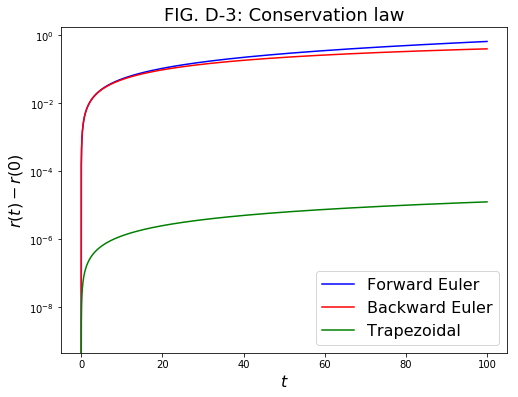

In [12]:
def conlaw(x, y):
    """
    Define the given conservative law.
    """
    r = np.sqrt(x**2 + y**2)
    return np.array(r)


# Set parameters.
dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
t_max = 100.


y_fe, t_all = forward_euler(f, u0, t0, t_max, dt)
y_be, t_all = backward_euler(f, u0, t0, t_max, dt)
y_tra, t_all = trapezoidal(f, u0, t0, t_max, dt)


# set up figure
fig, ax1 = plt.subplots(1, 1, figsize = (8, 6))
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('$r(t)-r(0)$', fontsize = 16)
ax1.set_title('FIG. D-3: Conservation law', fontsize = 18)

ax1.semilogy(t, np.abs( conlaw(y_fe[:,0], y_fe[:,1]) - conlaw(y_fe[0,0], y_fe[0,1]) ), 'b', label = 'Forward Euler')
ax1.semilogy(t, np.abs( conlaw(y_be[:,0], y_be[:,1]) - conlaw(y_be[0,0], y_be[0,1]) ), 'r', label = 'Backward Euler')
ax1.semilogy(t, np.abs( conlaw(y_tra[:,0], y_tra[:,1]) - conlaw(y_tra[0,0], y_tra[0,1]) ), 'g', label = 'Trapezoidal')

ax1.legend(loc='best', fontsize = 16);

plt.show()

## Comments on Figure D-3

At increasing time, forward and backward Euler display similar errors (condiring their absolute values), with the backward solution staying slightly closer to its initial value, as observed in Figure D-1.
The trapezoidal solution is the one that stays the closest to its initial value. It therefore achieves better accuracy compared to backward and forward Euler, as also noticed in Figure D-2.

# Appendix 1

In this appendix I investigate the reason for the increase in the discrepancy between the errors and the linear fit dicussed in Figure A-2.<br>

One possible reason is that, by the way the function of the numerical method is built, the last evaluation time of the solution is not exactly equals to t_max (where the analytical solution is evaluated to compute the LTE). This would introduce a further source of error that we are not accounting for.<br>


Time step sizes used in the calculation:
[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125] 



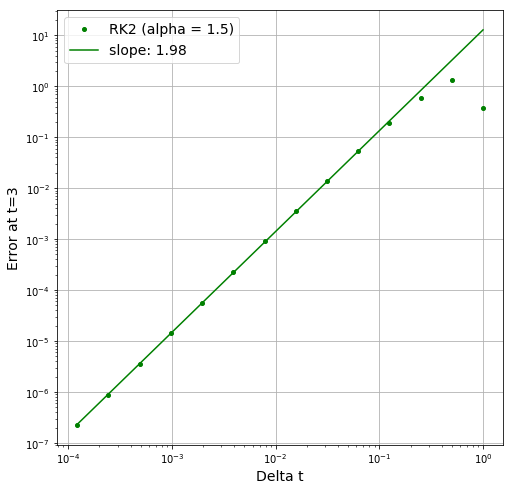


Last evaluation time for a time step of 1.000000: ... 3.000000
Last evaluation time for a time step of 0.500000: ... 3.000000
Last evaluation time for a time step of 0.250000: ... 3.000000
Last evaluation time for a time step of 0.125000: ... 3.000000
Last evaluation time for a time step of 0.062500: ... 3.000000
Last evaluation time for a time step of 0.031250: ... 3.000000
Last evaluation time for a time step of 0.015625: ... 3.000000
Last evaluation time for a time step of 0.007812: ... 3.000000
Last evaluation time for a time step of 0.003906: ... 3.000000
Last evaluation time for a time step of 0.001953: ... 3.000000
Last evaluation time for a time step of 0.000977: ... 3.000000
Last evaluation time for a time step of 0.000488: ... 3.000000
Last evaluation time for a time step of 0.000244: ... 3.000000
Last evaluation time for a time step of 0.000122: ... 3.000000


In [13]:
def f(t, y):
    """
    RHS function.
    """
    return y + t**3


def y_ex(t):
    """
    Analytical solution considering the RHS defined in the function f.
    """
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6


# Get the errors as a function of the timestep.
error_fe = []
error_ie = []
error_rk2_1 = []
error_rk2_2 = []
error_rk2_3 = []
error_rk2_4 = []
dt_array = []
y0 = 1.0
t0 = 0.0
t_max = 3
dt = 1.
alpha = 1.5
while dt > 1.e-4:
    dt_array.append(dt)
    err = approx_error_rk2(y_ex, y0, t0, t_max, dt, alpha)
    error_rk2_1.append(err)
    dt *= 0.5
print('\nTime step sizes used in the calculation:')
print(dt_array, '\n')



# Plot.
inifit = 3
rk2_1_fit = np.polyfit(np.log(dt_array[inifit:]), np.log(error_rk2_1[inifit:]), 1)

fig, ax1 = plt.subplots(1, 1, figsize = (8, 8))

ax1.loglog(dt_array, error_rk2_1, 'g.', label='RK2 (alpha = 1.5)', markersize = 8)
ax1.loglog(dt_array, np.exp(rk2_1_fit[1]) * dt_array**(rk2_1_fit[0]), 'g-', label = 'slope: {:.2f}'.format(rk2_1_fit[0]))

ax1.set_xlabel('Delta t', fontsize = 14)
ax1.set_ylabel('Error at t=3', fontsize = 14)
ax1.legend(loc = 'best', fontsize = 14)
ax1.grid(True)

plt.show()


y0 = 1.0
t0 = 0.0
t_max = 3
dt = .125
alpha = 1.5
print()
for dt in dt_array:
    y_all, t_all = RK2_alpha(f, y0, t0, t_max, dt, alpha)
    print("Last evaluation time for a time step of %f: ... %f" % (dt, t_all[-1]))


This test shows that the last evaluation time is always equals to t_max, even for large time step sizes. The reason for the discrepancy between the errors and the linear fit must therefore be something else.

# Appendix 2
### Test that the implmented Taylor series method works also for vector functions

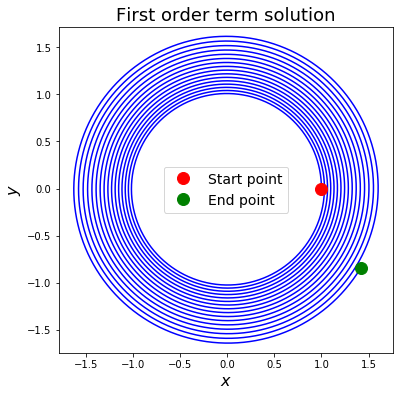

In [14]:
def f(t, u):
    """
    RHS function.
    """
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f


def ft(t, u):
    """
    Partial derivative of f in time.
    """
    ft = np.zeros_like(u)
    ft[0] = 0
    ft[1] = 0
    return ft

def fu(t, u):
    """
    Partial derivative of f in u.
    """
    fu = np.zeros_like(u)
    fu[0] = -1
    fu[1] = 1
    return fu

def ftt(t, u):
    """
    Second partial derivative of f in time.
    """
    ftt = np.zeros_like(u)
    ftt[0] = 0
    ftt[1] = 0
    return ftt

def fuu(t, u):
    """
    Second partial derivative of f in u.
    """
    fuu = np.zeros_like(u)
    fuu[0] = 0
    fuu[1] = 0
    return fuu

def fut(t,u):
    """
    Mixed partial derivative of f in u and time.
    """
    fut = np.zeros_like(u)
    fut[0] = 0
    fut[1] = 0
    return fut


dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
t_max = 100.
t_all, u1_all, u2_all, u3_all = TS_method(f, ft, fu, ftt, fuu, fut, t0, u0, t_max, dt)

# Fast plot, the result has to be equal to forward Euler.
fig, ax1 = plt.subplots(1, 1, figsize = (6, 6))
ax1.plot(u1_all[:,0], u1_all[:,1], 'b')
ax1.plot(u1_all[0,0], u1_all[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u1_all[-1,0], u1_all[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('First order term solution', fontsize=18)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)

plt.show()
